# Вопрос 5

Есть выборка клиентов с заявкой на кредитный продукт. Датасет состоит из персональных данных: возраст, пол и т.д. Необходимо предсказывать доход клиента, который представляет собой непрерывные данные, но сделать это нужно используя только модель классификации.

## Ответ

Если у нас есть переменная "доход", которая является непрерывной, но нам разрешено использовать только методы классификации, можно преобразовать задачу следующим образом:

Разделить непрерывный доход на интервалы, превратив его в категориальную переменную. Например:

- Доход < 50 тысяч → "Низкий"
- Доход от 50 до 100 тысяч → "Средний"
- Доход больше 100 тысяч → "Высокий"

Количество и границы этих интервалов можно выбрать исходя из характера данных и целей бизнеса.

После этого задача становится классификационной: модель определит, к какому из заранее определенных категориальных диапазонов относится доход конкретного клиента. Такой метод позволит хотя бы оценить примерный уровень дохода клиента.

Таким образом, мы искусственно преобразуем непрерывную переменную в категориальную, что позволяет применить классификационную модель для прогноза уровня дохода.

In [1]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Генерируем синтетику. Используем `make_regression` для генерации непрерывных данных.

In [2]:
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=30, random_state=42)

Так как доход может сильно варьироваться, сделаем его строго положительным.

In [3]:
y_reg = y_reg - y_reg.min() + 10

Разобьем доход на 3 категории: низкий, средний, высокий:

In [4]:
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_cat = kbins.fit_transform(y_reg.reshape(-1,1)).ravel().astype(int)

Превращая задачу в типовую задачу классификации:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_cat, test_size=0.3, random_state=42)

In [6]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [7]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.74


Выводим матрицу зависимостей:

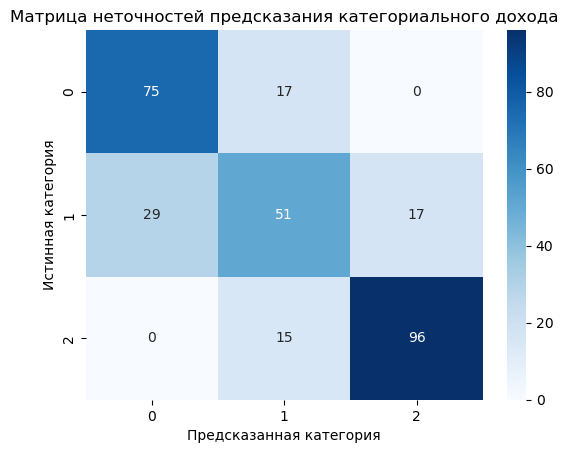

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица неточностей предсказания категориального дохода')
plt.xlabel('Предсказанная категория')
plt.ylabel('Истинная категория')
plt.show()

В итоге задача с непрерывными данными была переведена в категориальную, для которой был обучен классификатор.